# 1. IMPORTING LIBREARY:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import operator


from collections import Counter
from tqdm import tqdm

# 2. DATASET:

In [2]:
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\TA_restaurants_curated.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head(5)

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


# 3. RENAME THE DATASET COLUMNS:

In [3]:
old_column_name = list(dataset.columns)
new_column_name = []
for i in range(dataset.shape[1]):
    word = dataset.columns[i].lower()
    word = re.sub(' ', '_', word)
    new_column_name.append(word)

print('old_column_name: ', old_column_name)
print('\nnew_column_name: ', new_column_name)




# Rename the dataset columns
for i in range(len(old_column_name)):
    dataset = dataset.rename(columns={old_column_name[i] : new_column_name[i]})
dataset.head(2)

old_column_name:  ['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA']

new_column_name:  ['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta']


,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419


# 4. INITIAL NULL VALUES:

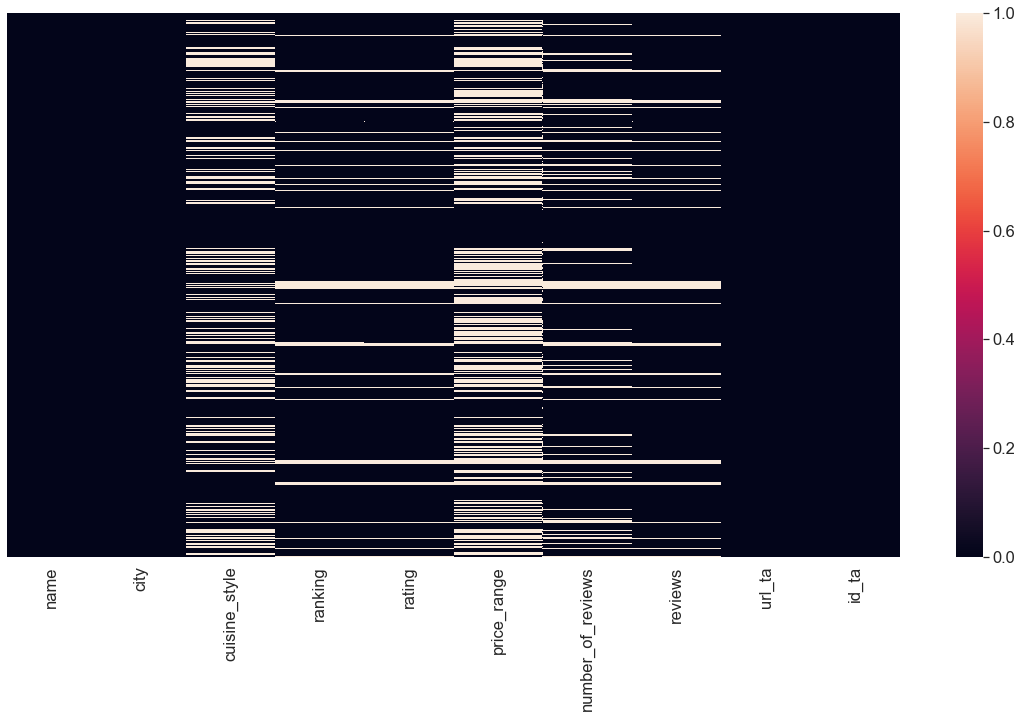

In [4]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [5]:
print('cuisine_style:', int((dict(dataset['cuisine_style'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')
print('ranking:', int((dict(dataset['ranking'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')
print('rating:', int((dict(dataset['rating'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')
print('price_range:', int((dict(dataset['price_range'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')
print('number_of_reviews:', int((dict(dataset['number_of_reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')
print('reviews:', int((dict(dataset['reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%')


cuisine_style: 24 %
ranking: 7 %
rating: 7 %
price_range: 38 %
number_of_reviews: 13 %
reviews: 7 %


# 5. NULL VALUES: `cuisine_style` 

In [7]:
# Python3 program to ways to convert 
# list enclosed within string to list 

def convert(lst): 
	return eval(lst) 

In [8]:
# for i in tqdm(range(dataset.shape[0])):
#     if type(dataset['cuisine_style'][i]) == str:
#         temp_list = []
#         for word in convert(dataset['cuisine_style'][i]):
#             word = word.lower()
#             word = re.sub(' ', '_', word)
#             temp_list.append(word)
#         dataset.loc[i, 'cuisine_style'] = str(temp_list)
#     else:
#         pass
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point1.csv')

100%|█████████████████████████████████████████████████████████████████████████| 125527/125527 [09:02<00:00, 231.32it/s]


In [9]:
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point1.csv')

In [10]:
cuisine_style_list = []
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        cuisine_style_list.extend(convert(dataset['cuisine_style'][i]))
    else:
        pass

100%|███████████████████████████████████████████████████████████████████████| 125527/125527 [00:04<00:00, 31108.15it/s]


In [11]:
dataset['cuisine_style'].isna().value_counts()

False    94176
True     31351
Name: cuisine_style, dtype: int64

In [12]:
unique_cuisine_style_dict = dict(Counter(cuisine_style_list))
unique_cuisine_style_dict = dict(sorted(unique_cuisine_style_dict.items(), key=operator.itemgetter(1), reverse=True))
unique_cuisine_style_dict

{'vegetarian_friendly': 32361,
 'european': 30228,
 'mediterranean': 18428,
 'italian': 17795,
 'vegan_options': 13009,
 'gluten_free_options': 12120,
 'bar': 9690,
 'french': 9558,
 'asian': 9064,
 'pizza': 8317,
 'spanish': 8220,
 'pub': 7404,
 'cafe': 7392,
 'fast_food': 5113,
 'british': 4836,
 'international': 4807,
 'japanese': 4483,
 'seafood': 4405,
 'central_european': 4160,
 'american': 4052,
 'chinese': 3690,
 'sushi': 3487,
 'portuguese': 3296,
 'indian': 3117,
 'middle_eastern': 2339,
 'thai': 2300,
 'wine_bar': 2259,
 'german': 2075,
 'czech': 1937,
 'greek': 1923,
 'healthy': 1909,
 'fusion': 1868,
 'steakhouse': 1692,
 'barbecue': 1676,
 'halal': 1672,
 'soups': 1653,
 'contemporary': 1619,
 'grill': 1592,
 'vietnamese': 1574,
 'eastern_european': 1470,
 'gastropub': 1462,
 'turkish': 1416,
 'mexican': 1387,
 'south_american': 1230,
 'austrian': 1183,
 'delicatessen': 1155,
 'polish': 1122,
 'hungarian': 1094,
 'scandinavian': 1038,
 'diner': 989,
 'lebanese': 904,
 'du

In [17]:
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        pass
    else:
        dataset.loc[i, 'cuisine_style'] = str(['vegetarian_friendly'])

100%|████████████████████████████████████████████████████████████████████████| 125527/125527 [01:27<00:00, 1437.48it/s]


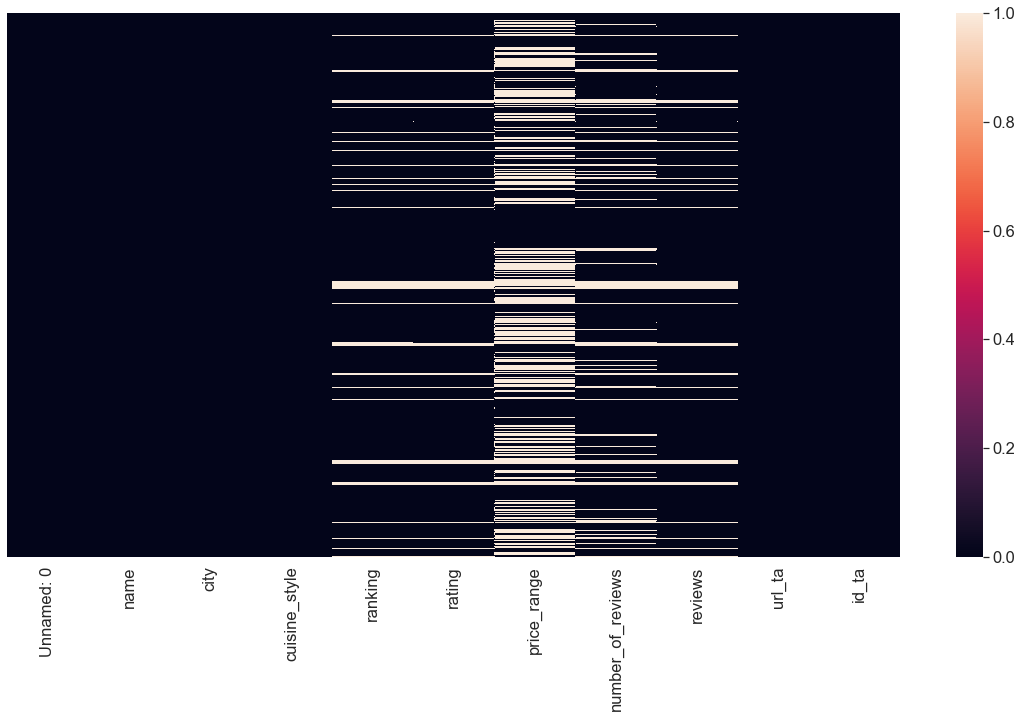

In [18]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [220]:
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point2.csv')
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point2.csv')

# 6. NULL VALUES: `number_of_reviews`

In [221]:
dataset['number_of_reviews'].isna().value_counts()


False    108183
True      17344
Name: number_of_reviews, dtype: int64

In [222]:
dataset['number_of_reviews']

0         136.0
1         812.0
2         567.0
3         564.0
4         316.0
          ...  
125522      NaN
125523      NaN
125524      NaN
125525      NaN
125526      NaN
Name: number_of_reviews, Length: 125527, dtype: float64

In [223]:
dataset['number_of_reviews'] = dataset['number_of_reviews'].fillna(dataset['number_of_reviews'].mean())

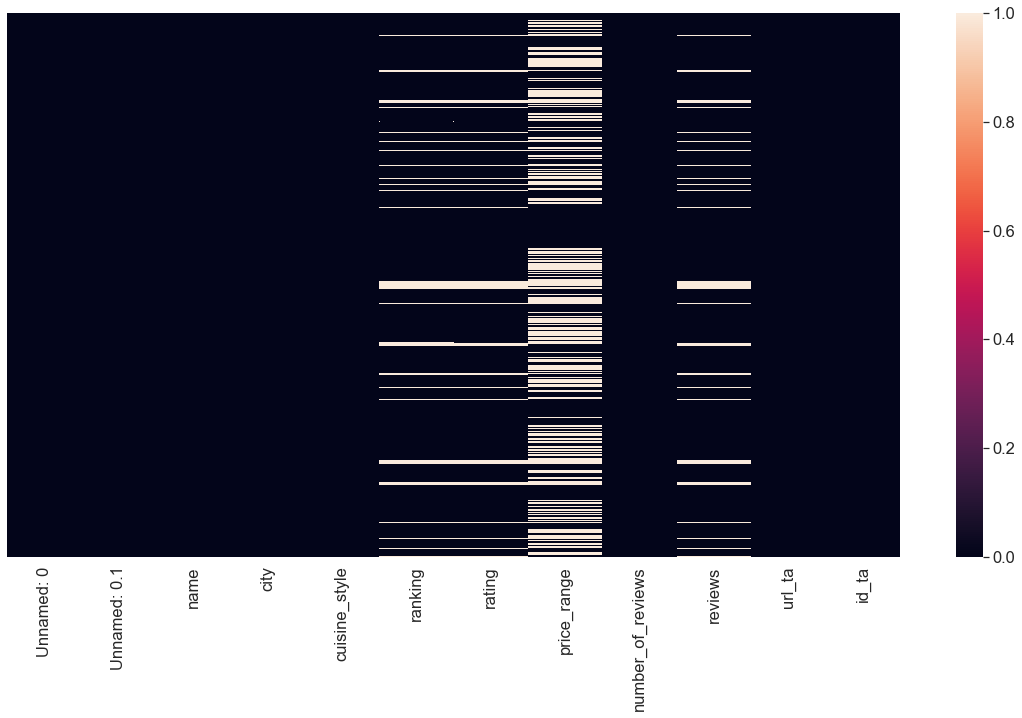

In [224]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 7. NULL VALUES: `price_range`

In [225]:
dataset['price_range'].isna().value_counts()

False    77672
True     47855
Name: price_range, dtype: int64

In [226]:
dataset['price_range'] = dataset['price_range'].fillna(dataset['price_range'].mode()[0])

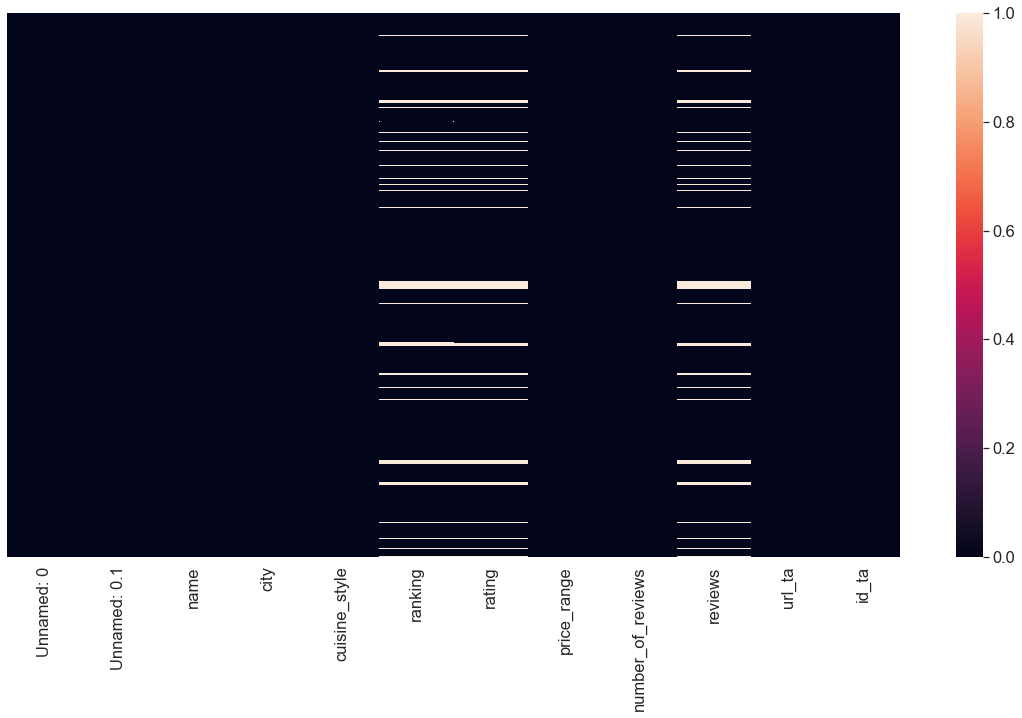

In [227]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 8. NULL VALUES: `reviews`

In [228]:
dataset['reviews']

0         [['Just like home', 'A Warm Welcome to Wintry ...
1         [['Great food and staff', 'just perfect'], ['0...
2         [['Satisfaction', 'Delicious old school restau...
3         [['True five star dinner', 'A superb evening o...
4         [['Best meal.... EVER', 'super food experience...
                                ...                        
125522                                                  NaN
125523                                                  NaN
125524                                                  NaN
125525                                                  NaN
125526                                                  NaN
Name: reviews, Length: 125527, dtype: object

In [229]:
dataset['reviews'].isna().value_counts()

False    115911
True       9616
Name: reviews, dtype: int64

In [230]:
# dataset['reviews'].dropna(axis=0, inplace=True)
dataset = dataset[dataset['reviews'].notna()]

In [231]:
dataset['reviews']

0         [['Just like home', 'A Warm Welcome to Wintry ...
1         [['Great food and staff', 'just perfect'], ['0...
2         [['Satisfaction', 'Delicious old school restau...
3         [['True five star dinner', 'A superb evening o...
4         [['Best meal.... EVER', 'super food experience...
                                ...                        
125450                                             [[], []]
125451    [['Poor quality, small portions, miserable st....
125452                                             [[], []]
125453                                             [[], []]
125454                                             [[], []]
Name: reviews, Length: 115911, dtype: object

In [232]:
dataset['reviews'].isna().value_counts()

False    115911
Name: reviews, dtype: int64

In [233]:
dataset.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
name                   0
city                   0
cuisine_style          0
ranking              164
rating                19
price_range            0
number_of_reviews      0
reviews                0
url_ta                 0
id_ta                  0
dtype: int64

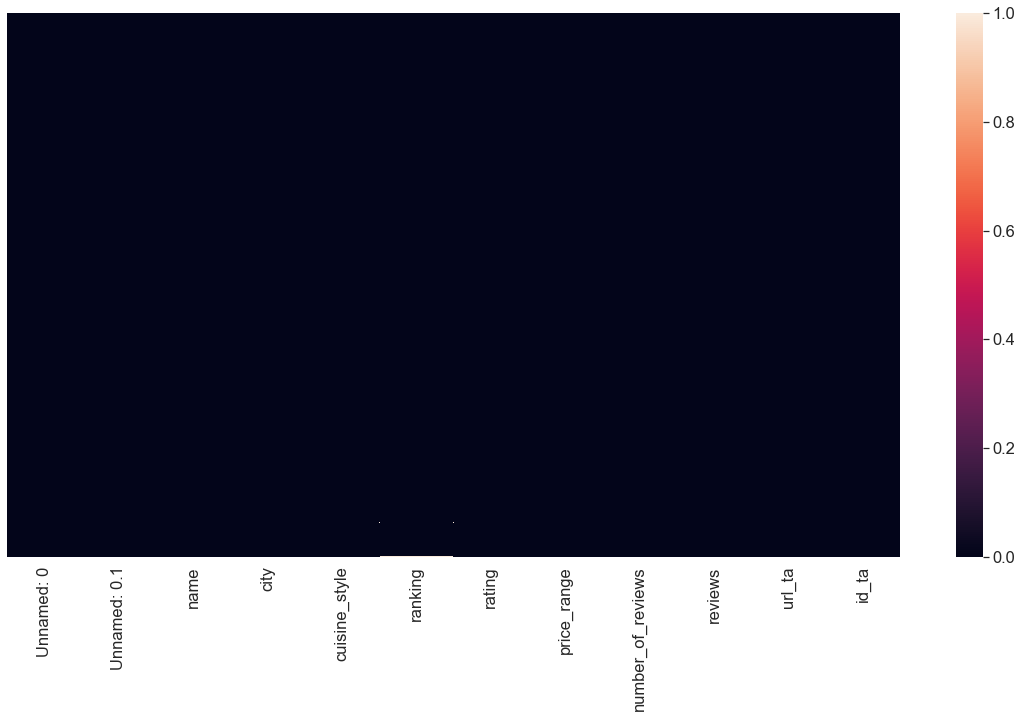

In [234]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 8. NULL VALUES: `reviews`

In [235]:
dataset['ranking']

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
           ...  
125450    1596.0
125451    1597.0
125452    1598.0
125453    1601.0
125454       NaN
Name: ranking, Length: 115911, dtype: float64

In [236]:
dataset = dataset[dataset['ranking'].notna()]

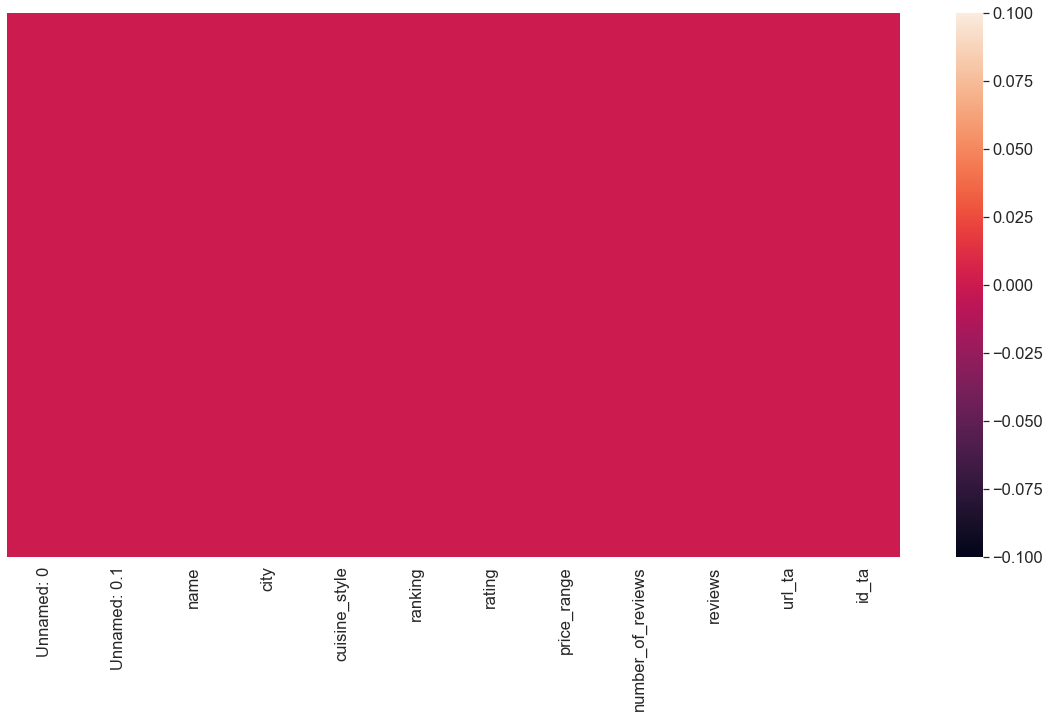

In [237]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [238]:
dataset.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
name                 0
city                 0
cuisine_style        0
ranking              0
rating               0
price_range          0
number_of_reviews    0
reviews              0
url_ta               0
id_ta                0
dtype: int64